In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
df_covid = pd.read_csv ('filtered_covid_data.csv')
df_population = pd.read_csv('filtered_population_data.csv')
df_population['Men.Region, subregion, country or area *'] = df_population['Men.Region, subregion, country or area *'].str.lower()
df_population

,Unnamed: 0,Men.Index,Men.Variant,"Men.Region, subregion, country or area *",Men.Country code,Men.Type,Men.Reference date (as of 1 July),Men.Population Men,Women.Population Women,Total Population
0,420,405,Estimates,burundi,108,Country/Area,2020,5899.864,5990.917,11890781.0
1,435,420,Estimates,comoros,174,Country/Area,2020,438.653,430.942,869595.0
2,450,435,Estimates,djibouti,262,Country/Area,2020,518.993,469.009,988002.0
3,465,450,Estimates,eritrea,232,Country/Area,2020,1777.548,1768.879,3546427.0
4,480,465,Estimates,ethiopia,231,Country/Area,2020,57516.835,57446.748,114963583.0
...,...,...,...,...,...,...,...,...,...,...
196,3765,3750,Estimates,luxembourg,442,Country/Area,2020,316.587,309.389,625976.0
197,3780,3765,Estimates,netherlands,528,Country/Area,2020,8537.145,8597.728,17134873.0
198,3795,3780,Estimates,switzerland,756,Country/Area,2020,4293.648,4360.970,8654618.0
199,3825,3810,Estimates,canada,124,Country/Area,2020,18732.178,19009.979,37742157.0


In [3]:
columns = ['date', 'location', 'new_cases', 'new_deaths', 'icu_patients', 'population','weekly_hosp_admissions', 
           'weekly_icu_admissions', 'weekly_hospital_admissions','total_tests', 'total_vaccinations',
           'hospital_beds_per_thousand', 'people_fully_vaccinated','total_boosters_per_hundred']
data_after = df_covid.filter(columns, axis=1)
data_after


,date,location,new_cases,new_deaths,icu_patients,population,weekly_hosp_admissions,weekly_icu_admissions,total_tests,total_vaccinations,hospital_beds_per_thousand,people_fully_vaccinated,total_boosters_per_hundred
0,2020-02-29,afghanistan,5.0,0.0,0.0,2.390126e+08,0.0,0.0,0.0,0.0,3.0,0.0,0.00
1,2020-03-31,afghanistan,163.0,4.0,0.0,1.234898e+09,0.0,0.0,0.0,0.0,15.5,0.0,0.00
2,2020-04-30,afghanistan,1661.0,56.0,0.0,1.195063e+09,0.0,0.0,0.0,0.0,15.0,0.0,0.00
3,2020-05-31,afghanistan,13353.0,194.0,0.0,1.234898e+09,0.0,0.0,0.0,0.0,15.5,0.0,0.00
4,2020-06-30,afghanistan,16265.0,485.0,0.0,1.195063e+09,0.0,0.0,0.0,0.0,15.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,2022-02-28,zimbabwe,6714.0,57.0,0.0,4.225808e+08,0.0,0.0,22367849.0,217644368.0,47.6,93887570.0,18.08
3238,2022-03-31,zimbabwe,9906.0,49.0,0.0,4.678573e+08,0.0,0.0,21250408.0,257066255.0,52.7,106801224.0,60.06
3239,2022-04-30,zimbabwe,1589.0,25.0,0.0,4.527651e+08,0.0,0.0,13317408.0,281330472.0,51.0,101086953.0,131.55
3240,2022-05-31,zimbabwe,4523.0,34.0,0.0,4.678573e+08,0.0,0.0,16009715.0,324533823.0,52.7,121625935.0,174.49


In [4]:
list_countries = [
    'argentina',
    'brazil',
    'chile',
    'colombia',
    'costa rica',
    'czechia',
    'israel',
    'netherlands',
    'oman',
    'peru',
    'portugal',
    'serbia',
    'slovakia',
    'spain',
    'sweden',
    'united kingdom',
    'united states'
]

data_time = data_after[data_after['location'].isin(list_countries)]
data_time

,date,location,new_cases,new_deaths,icu_patients,population,weekly_hosp_admissions,weekly_icu_admissions,total_tests,total_vaccinations,hospital_beds_per_thousand,people_fully_vaccinated,total_boosters_per_hundred
86,2020-01-31,argentina,0.0,0.0,0.0,1.413781e+09,0.0,0.0,1.164700e+04,0.000000e+00,155.00,0.000000e+00,0.00
87,2020-02-29,argentina,0.0,0.0,0.0,1.322569e+09,0.0,0.0,1.040900e+04,0.000000e+00,145.00,0.000000e+00,0.00
88,2020-03-31,argentina,1054.0,27.0,0.0,1.413781e+09,0.0,0.0,6.859200e+04,0.000000e+00,155.00,0.000000e+00,0.00
89,2020-04-30,argentina,3374.0,191.0,0.0,1.368175e+09,0.0,0.0,1.074259e+06,0.000000e+00,150.00,0.000000e+00,0.00
90,2020-05-31,argentina,12423.0,321.0,0.0,1.413781e+09,0.0,0.0,4.061031e+06,0.000000e+00,155.00,0.000000e+00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098,2022-02-28,united states,3955578.0,61768.0,404168.0,9.321622e+09,1890554.0,0.0,2.271796e+10,1.550773e+10,77.56,6.047710e+09,803.20
3099,2022-03-31,united states,1055605.0,32490.0,119868.0,1.032037e+10,573514.0,0.0,2.606096e+10,1.741136e+10,85.87,6.761114e+09,923.82
3100,2022-04-30,united states,1252214.0,12705.0,47488.0,9.987452e+09,350786.0,0.0,2.595071e+10,1.716234e+10,83.10,6.587637e+09,959.11
3101,2022-05-31,united states,2870718.0,10899.0,64927.0,1.032037e+10,694363.0,0.0,2.754453e+10,1.809274e+10,85.87,6.847579e+09,1071.03


In [5]:
data_time['percentage_vaccinated'] = data_time.iloc[:,-2].div(data_after['population'], axis=0).round(2)
# data_after['death/case'] = data_after.iloc[:,3].div(data_after['total_cases'], axis=0).round(3)
data_agg = data_time[(data_after['date'] == '2022-03-31')]
data_agg['percentage_vaccinated'] = data_agg.iloc[:,-3].div(data_after['population'], axis=0).round(3)
data_agg

/var/folders/r1/5w6c9dw572lfs4_lj28w_ht80000gn/T/ipykernel_23150/2626417534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_time['percentage_vaccinated'] = data_time.iloc[:,-2].div(data_after['population'], axis=0).round(2)
/var/folders/r1/5w6c9dw572lfs4_lj28w_ht80000gn/T/ipykernel_23150/2626417534.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_agg = data_time[(data_after['date'] == '2022-03-31')]
/var/folders/r1/5w6c9dw572lfs4_lj28w_ht80000gn/T/ipykernel_23150/2626417534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

,date,location,new_cases,new_deaths,icu_patients,population,weekly_hosp_admissions,weekly_icu_admissions,total_tests,total_vaccinations,hospital_beds_per_thousand,people_fully_vaccinated,total_boosters_per_hundred,percentage_vaccinated
112,2022-03-31,argentina,137255.0,1867.0,23945.0,1.413781e+09,0.0,0.0,1.088984e+09,2.969179e+09,155.000,1.142643e+09,1245.29,0.808
370,2022-03-31,brazil,1155099.0,10346.0,0.0,6.633797e+09,0.0,0.0,1.408751e+08,1.213746e+10,68.200,4.742729e+09,1006.44,0.715
599,2022-03-31,chile,409917.0,2780.0,27260.0,5.955832e+08,47695.0,9043.0,1.056537e+09,1.548057e+09,65.410,5.370879e+08,2474.70,0.902
657,2022-03-31,colombia,20333.0,854.0,0.0,1.589241e+09,0.0,0.0,1.039199e+09,8.770100e+08,53.010,3.787423e+08,210.47,0.238
713,2022-03-31,costa rica,31609.0,263.0,0.0,1.593106e+08,0.0,0.0,9.438796e+07,3.955715e+07,35.030,1.566131e+07,131.10,0.098
769,2022-03-31,czechia,247707.0,1100.0,6489.0,3.324611e+08,68106.0,4496.0,1.654360e+09,5.411214e+08,205.530,2.125098e+08,1173.73,0.639
1373,2022-03-31,israel,283722.0,287.0,5261.0,2.880210e+08,19740.0,1111.0,1.476401e+09,5.600054e+08,92.690,1.900417e+08,1744.95,0.660
1918,2022-03-31,netherlands,1497814.0,434.0,4657.0,5.323659e+08,43475.0,3220.0,9.139946e+08,1.320769e+08,102.920,4.775953e+07,210.61,0.090
2082,2022-03-31,oman,6099.0,6.0,0.0,1.619247e+08,0.0,0.0,1.986264e+06,2.091950e+07,49.600,9.055303e+06,27.87,0.056
2195,2022-03-31,peru,29436.0,1535.0,0.0,1.034142e+09,0.0,0.0,8.699903e+08,2.042873e+09,49.600,7.945824e+08,1095.99,0.768


In [15]:
data = data_agg.sort_values('percentage_vaccinated').tail(10)
data['percentage_vaccinated'] = data['percentage_vaccinated'] * 100
data

,date,location,new_cases,new_deaths,icu_patients,population,weekly_hosp_admissions,weekly_icu_admissions,total_tests,total_vaccinations,hospital_beds_per_thousand,people_fully_vaccinated,total_boosters_per_hundred,percentage_vaccinated
2683,2022-03-31,spain,530785.0,2982.0,19289.0,1.449102e+09,102329.0,7424.0,2.710510e+09,6.529098e+08,92.07,2.774303e+08,208.28,19.1
657,2022-03-31,colombia,20333.0,854.0,0.0,1.589241e+09,0.0,0.0,1.039199e+09,8.770100e+08,53.01,3.787423e+08,210.47,23.8
769,2022-03-31,czechia,247707.0,1100.0,6489.0,3.324611e+08,68106.0,4496.0,1.654360e+09,5.411214e+08,205.53,2.125098e+08,1173.73,63.9
3099,2022-03-31,united states,1055605.0,32490.0,119868.0,1.032037e+10,573514.0,0.0,2.606096e+10,1.741136e+10,85.87,6.761114e+09,923.82,65.5
1373,2022-03-31,israel,283722.0,287.0,5261.0,2.880210e+08,19740.0,1111.0,1.476401e+09,5.600054e+08,92.69,1.900417e+08,1744.95,66.0
370,2022-03-31,brazil,1155099.0,10346.0,0.0,6.633797e+09,0.0,0.0,1.408751e+08,1.213746e+10,68.20,4.742729e+09,1006.44,71.5
3069,2022-03-31,united kingdom,2278953.0,4026.0,9113.0,2.114421e+09,400974.0,0.0,1.475215e+10,4.368141e+09,78.74,1.526654e+09,1752.78,72.2
2195,2022-03-31,peru,29436.0,1535.0,0.0,1.034142e+09,0.0,0.0,8.699903e+08,2.042873e+09,49.60,7.945824e+08,1095.99,76.8
112,2022-03-31,argentina,137255.0,1867.0,23945.0,1.413781e+09,0.0,0.0,1.088984e+09,2.969179e+09,155.00,1.142643e+09,1245.29,80.8
599,2022-03-31,chile,409917.0,2780.0,27260.0,5.955832e+08,47695.0,9043.0,1.056537e+09,1.548057e+09,65.41,5.370879e+08,2474.70,90.2


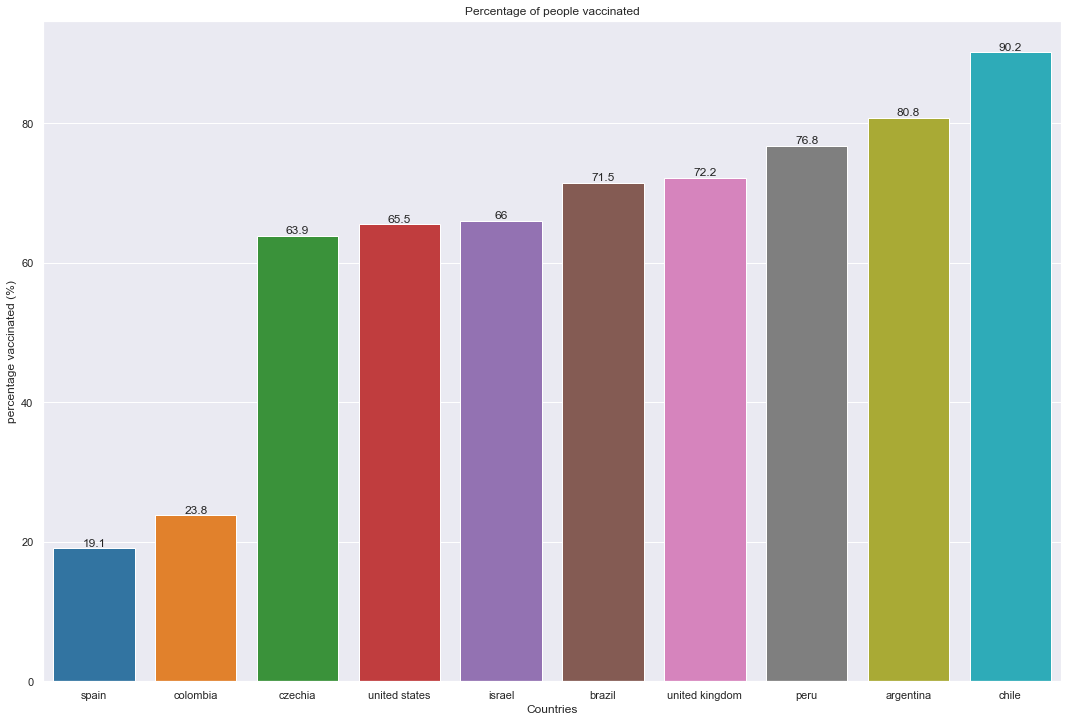

In [17]:
# plt.show()
fig_dims = (15, 10)

#set seaborn plotting aesthetics
sns.set(style='white')
sns.set(rc={'figure.figsize':(15,10)})
fig_dims = (15, 10)

fig, ax = plt.subplots(figsize=fig_dims)

ax = sns.barplot(x='location', y='percentage_vaccinated',
                 data=data,
                 errwidth=0, palette="tab10")
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.title('Percentage of people vaccinated')
plt.xlabel('Countries')
plt.ylabel('percentage vaccinated (%)')
plt.show()

In [8]:
countries = ['chile', 'argentina', 'peru', 'united kingdom', 'israel']
data_top5 = data_time[data_time['location'].isin(countries)]

In [9]:
# data_after['death/case'] = data_after.iloc[:,3].div(data_after['total_cases'], axis=0).round(3)
data_booster = data_top5[(data_top5['date'] >= '2022-01-31') & (data_top5['date'] <= '2022-05-31')]
data_booster.date = pd.DatetimeIndex(data_booster.date)
data_booster

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,date,location,new_cases,new_deaths,icu_patients,population,weekly_hosp_admissions,weekly_icu_admissions,total_tests,total_vaccinations,hospital_beds_per_thousand,people_fully_vaccinated,total_boosters_per_hundred,percentage_vaccinated
110,2022-01-31,argentina,2724248.0,4104.0,67180.0,1.413781e+09,0.0,0.0,9.739346e+08,2.603953e+09,155.00,1.070756e+09,685.36,0.76
111,2022-02-28,argentina,522000.0,4879.0,55232.0,1.276963e+09,0.0,0.0,9.548641e+08,2.577682e+09,140.00,1.010226e+09,964.49,0.79
112,2022-03-31,argentina,137255.0,1867.0,23945.0,1.413781e+09,0.0,0.0,1.088984e+09,2.969179e+09,155.00,1.142643e+09,1245.29,0.81
113,2022-04-30,argentina,34319.0,523.0,7863.0,1.368175e+09,0.0,0.0,1.072831e+09,2.940327e+09,150.00,1.115692e+09,1322.85,0.82
114,2022-05-31,argentina,158343.0,347.0,0.0,1.413781e+09,0.0,0.0,1.121917e+09,3.132134e+09,155.00,1.159318e+09,1554.31,0.82
597,2022-01-31,chile,359490.0,606.0,13765.0,5.955832e+08,35992.0,4267.0,8.759783e+08,1.416341e+09,65.41,5.199270e+08,1937.23,0.87
598,2022-02-28,chile,895035.0,2632.0,23334.0,5.379461e+08,88451.0,12100.0,8.785025e+08,1.335346e+09,59.08,4.790862e+08,1958.67,0.89
599,2022-03-31,chile,409917.0,2780.0,27260.0,5.955832e+08,47695.0,9043.0,1.056537e+09,1.548057e+09,65.41,5.370879e+08,2474.70,0.90
600,2022-04-30,chile,87695.0,947.0,11090.0,5.763709e+08,13063.0,2411.0,1.082886e+09,1.550348e+09,63.30,5.229600e+08,2642.11,0.91
601,2022-05-31,chile,144310.0,365.0,4961.0,5.955832e+08,12667.0,1360.0,1.163203e+09,1.692992e+09,65.41,5.423215e+08,3187.36,0.91


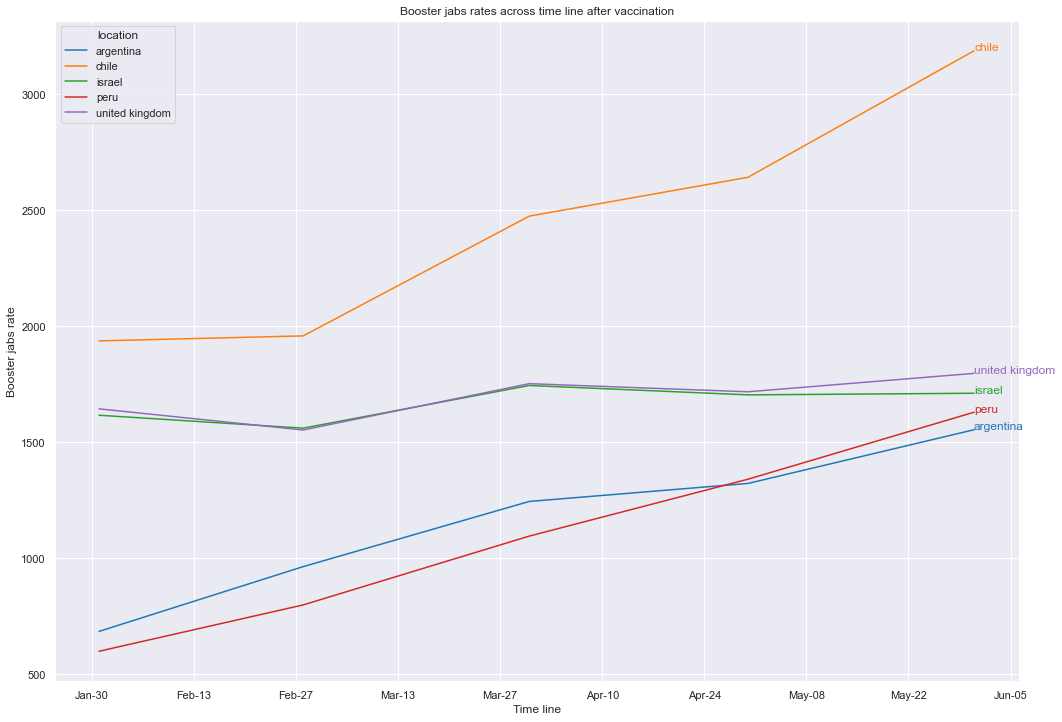

In [12]:
#set seaborn plotting aesthetics
sns.set(style='white')
sns.set(rc={'figure.figsize':(15,10)})

# Make a plot
fig, ax = plt.subplots()

# Add lines to it
from matplotlib import rcParams

rcParams['figure.figsize'] = 20,15
sns.lineplot(ax=ax, data=data_booster, x="date", y="total_boosters_per_hundred", hue="location", legend=True, palette="tab10")

# Add the text--for each line, find the end, annotate it with a label, and
# adjust the chart axes so that everything fits on.
for line, name in zip(ax.lines, data_booster.location.unique().tolist()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(name,
               xy=(x, y),
               xytext=(0, 0),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * .5)

# Format the date axis to be prettier.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_locator(mdates.AutoDateLocator(interval_multiples=False))
plt.tight_layout()
plt.title('Booster jabs rates across time line after vaccination')
plt.xlabel('Time line')
plt.ylabel('Booster jabs rate')
plt.show()

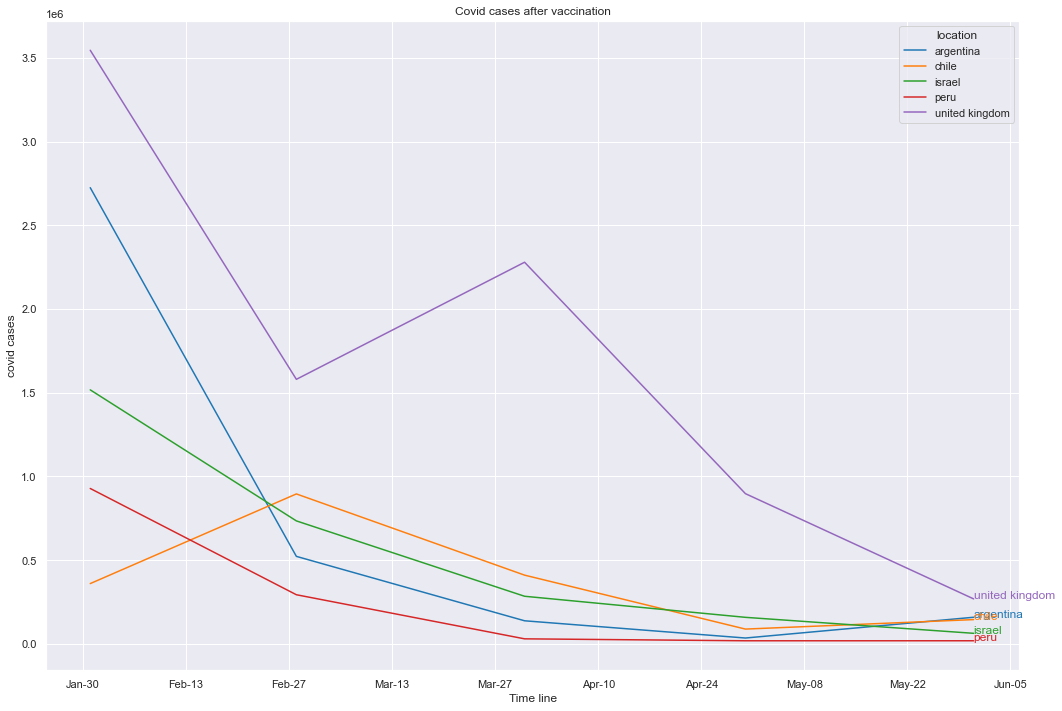

In [13]:
#set seaborn plotting aesthetics
sns.set(style='white')
sns.set(rc={'figure.figsize':(15,10)})

# Make a plot
fig, ax = plt.subplots()

# Add lines to it
from matplotlib import rcParams

rcParams['figure.figsize'] = 20,15
sns.lineplot(ax=ax, data=data_booster, x="date", y="new_cases", hue="location", legend=True, palette="tab10")

# Add the text--for each line, find the end, annotate it with a label, and
# adjust the chart axes so that everything fits on.
for line, name in zip(ax.lines, data_booster.location.unique().tolist()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(name,
               xy=(x, y),
               xytext=(0, 0),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * .5)

# Format the date axis to be prettier.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_locator(mdates.AutoDateLocator(interval_multiples=False))
plt.tight_layout()
plt.title('Covid cases after vaccination')
plt.xlabel('Time line')
plt.ylabel('covid cases')
plt.show()